In [1]:
import requests
from bs4 import BeautifulSoup

import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [60]:
def get_html(adress):
    rq_header = {
        'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; W…) Gecko/20100101 Firefox/56.0'
    }
    #cookies = 'last_visit=2017-10-12+09%3A37%3A52; _ym_uid=15066802161018902005; yandexuid=6800980111494950616; loc2=yes; spravka=dD0xNTA3NzkzNTM0O2k9NzkuMTY1LjI3LjE4Mjt1PTE1MDc3OTM1MzQ0NTg2OTk5NzU7aD1kNDBlNTNkMjg0MjMwNjU3NjQ3MDU4MzQ4NGY3NmY2ZA==; my_perpages=%5B%5D; mykp_button=edit_main; mobile=no; refresh_yandexuid=6800980111494950616; Session_id=3%3A1507484993.5.0.1507484993512%3AthulTw%3AE5.0%7C1110000001562064.-1.0%7C30%3A166575.958233.K4qhXe4aiOn2sUZCKTVuQYiXTfI; tc=1; noflash=true; PHPSESSID=3clsd5uauaq4hq7v7cjm3cn6u6; uid=1562064; user_country=ru; yandex_gid=213; _ym_isad=1; desktop_session_key=2aa1ff6214bd69f49034814a1c9308ec71ca9aa2f10795a32f90b1135e6387e0bf07ef7688421a6e9cdba252f184feb2873892739c61ca29f6a6ef97db4206c7da8b74c32666eae10c14df3b2b455a51; desktop_session_key.sig=GEmzMCJSpb7WiP6KVmwUBULFX90'
    S = requests.Session()
    RRR = requests.Request('GET', adress)
    response = requests.get(adress, headers=rq_header)#, cookies=cookies)
    return response.text

In [3]:
def get_from_tag(string):
    string = string[string.find('>')+1:string.find('</')]
    return string 

In [4]:
def get_film_score(adress):
    '''
    возвращает рейтинг imdb и кинопоиска одного фильма по его ссылке
    '''
    html = get_html(adress)
    soup = BeautifulSoup(html,"lxml")
    
    score_block = soup.find('div', class_='block_2')
    
    score_imdb = score_block.find_all('div')[-1]

    str_score_imdb = str(score_imdb)
    num_score_imdb = str_score_imdb[str_score_imdb.find('>')+1:str_score_imdb.find('</')]
    num_score_imdb = num_score_imdb[num_score_imdb.find(' ')+1:]
    num_score_imdb = num_score_imdb[:num_score_imdb.find(' ')]
    num_score_imdb = float(num_score_imdb)
    
    score_kp = my_soup.find('span', class_='rating_ball')

    str_score_kp = str(score_kp)
    num_score_kp = float(str_score_kp[str_score_kp.find('>')+1:str_score_kp.find('</')])

    return num_score_imdb, num_score_kp

In [83]:
def get_one_vote_info(one_vote):
    '''
    информация из ячейки одного фильма
    '''
    film_name = one_vote.find('div', class_='nameRus').find('a').string
    film_rating = one_vote.find('div', class_='rating').find('b').string
    film_vote = one_vote.find('div', class_='vote').string
    
    film_ref = one_vote.find('div', class_='nameRus').find('a')
    film_ref = str(film_ref)
    film_ref = film_ref[film_ref.find('"/')+2:film_ref.find('/"')]
    
    film_votes = one_vote.find('div', class_='rating').find_all('span')[0].string
    
    film_length = one_vote.find('div', class_='rating').find_all('span')[1].string
    
    film_name_eng = one_vote.find('div', class_='nameEng').string
    
    film_vote_date = one_vote.find('div', class_='date').string
    
    return [film_name,film_ref,film_rating,film_vote,film_votes, film_length, film_name_eng, film_vote_date]

In [6]:
def get_num_of_pages(votes_soup):
    '''
    возвращает количество страниц с оценками в профиле пользователя
    '''
    i = votes_soup.find('div', class_='pagesFromTo').string[votes_soup.find('div', class_='pagesFromTo').string.find(' ')+4:]
    return int(i)/50+1

In [7]:
def get_ref_add(votes_soup):
    '''
    возвращает добавочную строку к ссылке на страницу с оценками, чтобы открыть nextpage
    '''
    next_votes_list = votes_soup.find('table', class_='historyVotes').find('ul', class_='list').find_all('li', class_='arr')[-2].find('a')
    next_votes_list = str(next_votes_list)
    ref_add = next_votes_list[next_votes_list.find('s/')+2:next_votes_list.find('">')]
    return ref_add

In [8]:
user_id = str(1562064)
def get_user_votes(user_id):
    t1 = time.time()
    user_id = str(user_id)
    page_votes = 'https://www.kinopoisk.ru/user/'+user_id+'/votes/'

    votes_html = get_html(page_votes)

    votes_soup = BeautifulSoup(votes_html, 'lxml')

    votes_profileFilmsList = votes_soup.find('div', class_='profileFilmsList')

    # получаем 50 оценок 
    user_votes = []
    for i in range(len(votes_profileFilmsList.find_all('div', class_='item'))):
        one_vote = votes_profileFilmsList.find_all('div', class_='item')[i]
        one_vote_info = get_one_vote_info(one_vote)
        user_votes.append(one_vote_info)

    for i in range(get_num_of_pages(votes_soup)):
        page_votes = 'https://www.kinopoisk.ru/user/'+user_id+'/votes/'
        new_page_votes = page_votes+get_ref_add(votes_soup)

        votes_html = get_html(new_page_votes)

        votes_soup = BeautifulSoup(votes_html, 'lxml')

        votes_profileFilmsList = votes_soup.find('div', class_='profileFilmsList')

        # получаем 50 оценок 
        for i in range(len(votes_profileFilmsList.find_all('div', class_='item'))):
            one_vote = votes_profileFilmsList.find_all('div', class_='item')[i]
            one_vote_info = get_one_vote_info(one_vote)
            user_votes.append(one_vote_info)
    t2 = time.time()
    print t2-t1
    return user_votes

In [84]:
user_votes = get_user_votes(user_id)

36.2409999371


In [86]:
for i in range(len(user_votes[0])):
    print user_votes[0][i]

Игра на понижение (2015)
film/igra-na-ponizhenie-2015-501333
7.263
9
(66 969)
130 мин.
The Big Short
11.10.2017, 22:43


In [87]:
def is_it_a_film(film_name):
    if film_name.find(')') - film_name.find('(') <= 5:
        return True
    else:
        return False

In [88]:
def return_year(film_name):
    return film_name[film_name.find('(')+1:film_name.find(')')]

In [89]:
for i in range(len(user_votes)):
    user_votes[i].append(return_year(user_votes[i][0]))
    user_votes[i].append(is_it_a_film(user_votes[i][0]))

In [90]:
print str(user_votes[-1][3])

9


In [91]:
def get_votes_distrib(user_votes):
    votes_distrib = {str(i):0 for i in range(11)}
    votes_distrib.update({str(None):0})
    for i in range(len(user_votes)):
        votes_distrib[str(user_votes[i][3])] += 1
    votes_distrib.pop('None')
    list_ret = []
    for i in range(11):
        list_ret.append(votes_distrib[str(i)])
    list_votes = []
    for i in range(len(user_votes)):
        if user_votes[i][3] != None:
            list_votes.append(int(user_votes[i][3]))
    return list_ret, list_votes

In [92]:
voDistr, voList = get_votes_distrib(user_votes)

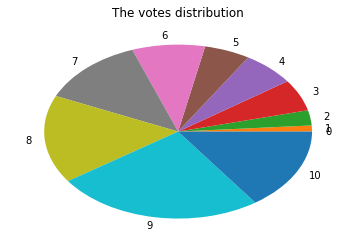

In [93]:
fig = plt.figure()
#fig.set_size_inches([12,12])
plt.pie(voDistr, labels=[str(i) for i in range(11)])
#fig.grid()
plt.title('The votes distribution')

plt.show()

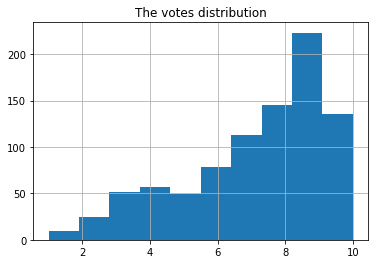

In [94]:
plt.hist(voList)
plt.title('The votes distribution')
plt.grid()
plt.show()

In [119]:
head = ['nameRus', 'link', 'rating', 'vote', 'numVotes', 'len', 'nameEng', 'dateWatch', 'yearRelease', 'isFilm']
data = pd.DataFrame(user_votes, columns=head)
csvData = data.to_csv('myKp.csv',encoding='utf-32')

the following lines does not work correclty


func aimed at info about one movie from its page


In [37]:
def get_film_info(film):
    html = get_html(film)
    soup = BeautifulSoup(html,"lxml")
    
    info_block = soup.find('table', class_='info')

    str_time = u'время'
    str_age = u'возраст'
    str_money = u'сборы в России'
    
    print film
    
    moviename = soup.find('h1', class_='moviename-big')#.string
    
    info_block_tr = info_block.find_all('tr')

    tmp = {}

    for i in range(len(info_block_tr)):
        if info_block_tr[i].find_all('td')[1].string != None:
            tmp.update({info_block_tr[i].find_all('td')[0].string : info_block_tr[i].find_all('td')[1].string})
        elif info_block_tr[i].find_all('td')[1].find('a') != None:
            list_tmp = []
            for a in range(len(info_block_tr[i].find_all('td')[1].find_all('a'))):
                list_tmp.append(info_block_tr[i].find_all('td')[1].find_all('a')[a].string)
                tmp.update({info_block_tr[i].find_all('td')[0].string:list_tmp})
        else:
            if info_block_tr[i].find_all('td')[0].string == str_time:
                tmp.update({info_block_tr[i].find_all('td')[0].string : get_length(info_block_tr[i].find_all('td')[1])})
            elif info_block_tr[i].find_all('td')[0].string == str_age:
                tmp.update({info_block_tr[i].find_all('td')[0].string : get_age(info_block_tr[i].find_all('td')[1])})
            elif info_block_tr[i].find_all('td')[0].string == str_money:
                tmp.update({info_block_tr[i].find_all('td')[0].string : get_money(info_block_tr[i].find_all('td')[1])})
                
    return {moviename : tmp}

In [95]:
def make_film_link(inpt):
    return 'https://www.kinopoisk.ru/' + inpt

In [96]:
def get_length(time_tr):
    time_tr = str(time_tr)
    time_tr = time_tr[time_tr.find('>')+1:]
    time_tr = time_tr[:time_tr.find('<')]
    return time_tr

In [97]:
def get_money(money_td):
    money_td = money_td.find('div').string
    money_td = money_td[money_td.find('$'):]
    money_td = money_td[:money_td.find('  ')]
    return money_td

In [98]:
def get_age(age_td):
    return age_td.find('span').string

In [81]:
films_info = {}
t1 = time.time()
for i in range(len(user_votes)):
    #print make_film_link(user_votes[i][1])
    films_info.update(get_film_info(make_film_link(user_votes[i][1])))
t2 = time.time()
print t2-t1

https://www.kinopoisk.ru/film/igra-na-ponizhenie-2015-501333


AttributeError: 'NoneType' object has no attribute 'find_all'